# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [65]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', '\t')

### Step 4. See the first 10 entries

In [66]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

In [67]:
top_five = chipo.groupby('item_name').sum()['quantity'].sort_values(ascending=False)[:5]

In [68]:
top_five

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

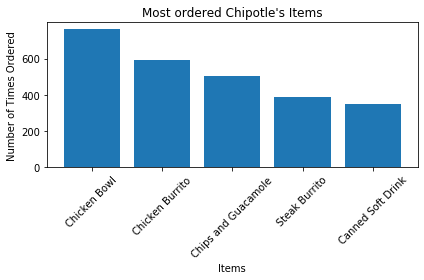

In [69]:
fig, ax = plt.subplots()

ax.bar(x=top_five.index, height=top_five)
ax.set_xlabel('Items')
ax.set_ylabel('Number of Times Ordered')
ax.set_title('Most ordered Chipotle\'s Items')
plt.xticks(rotation=45)
plt.tight_layout()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [70]:
chipo['item_price'] = chipo['item_price'].str[1:].astype(float)

In [71]:
items_ordered = chipo.groupby('order_id').sum()

Text(0, 0.5, 'Items Ordered')

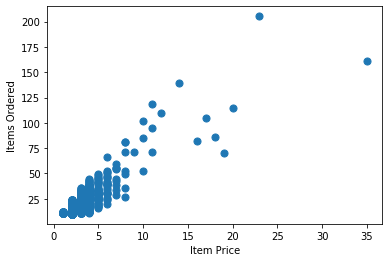

In [78]:
fig, ax = plt.subplots()

ax.scatter(x=items_ordered['quantity'], y=items_ordered['item_price'], s=50)
ax.set_xlabel('Item Price')
ax.set_ylabel('Items Ordered')